In [1]:
# Ensure you have pandas imported
import pandas as pd

# Load the data
file_path = '/EV_India.csv'  # Update this with your file path
ev_data = pd.read_csv(file_path)

# Data cleaning: Remove commas, extract numeric values, and convert to float
ev_data['Total Electric Vehicle'] = ev_data['Total Electric Vehicle'].str.replace(',', '').str.extract('(\d+)').astype(float)
ev_data['Total Non-Electric Vehicle'] = ev_data['Total Non-Electric Vehicle'].str.replace(',', '').str.extract('(\d+)').astype(float)
ev_data['Total'] = ev_data['Total'].str.replace(',', '').str.extract('(\d+)').astype(float)

# Drop rows with missing values in critical columns
cleaned_ev_data = ev_data.dropna(subset=['Total Electric Vehicle', 'Total Non-Electric Vehicle'])

# Display cleaned data to verify
cleaned_ev_data.head()


,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162.0,146945.0,147107.0
2,3,Arunachal Pradesh,20.0,252965.0,252985.0
3,4,Assam,64766.0,4677053.0,4741819.0
4,5,Bihar,83335.0,10407078.0,10490413.0
5,6,Chandigarh,2812.0,746881.0,749693.0


In [2]:
# Basic analysis: Calculate total electric and non-electric vehicles
total_ev = cleaned_ev_data['Total Electric Vehicle'].sum()
total_non_ev = cleaned_ev_data['Total Non-Electric Vehicle'].sum()
total_vehicles = cleaned_ev_data['Total'].sum()

# Display the totals
print(f"Total Electric Vehicles: {total_ev}")
print(f"Total Non-Electric Vehicles: {total_non_ev}")
print(f"Total Vehicles: {total_vehicles}")

# Average number of electric vehicles per state
average_ev_per_state = cleaned_ev_data['Total Electric Vehicle'].mean()
print(f"Average Electric Vehicles per State: {average_ev_per_state:.2f}")


Total Electric Vehicles: 1334385.0
Total Non-Electric Vehicles: 278169631.0
Total Vehicles: 279504016.0
Average Electric Vehicles per State: 41699.53


In [3]:
# Define thresholds for segmentation
high_threshold = cleaned_ev_data['Total Electric Vehicle'].quantile(0.75)  # Top 25%
low_threshold = cleaned_ev_data['Total Electric Vehicle'].quantile(0.25)    # Bottom 25%

# Function to assign EV adoption level
def segment_ev(row):
    if row['Total Electric Vehicle'] >= high_threshold:
        return 'High EV Adoption'
    elif row['Total Electric Vehicle'] <= low_threshold:
        return 'Low EV Adoption'
    else:
        return 'Medium EV Adoption'

# Apply the segmentation function
cleaned_ev_data['EV Adoption Level'] = cleaned_ev_data.apply(segment_ev, axis=1)

# View the segmented data
print(cleaned_ev_data[['State Name', 'Total Electric Vehicle', 'EV Adoption Level']])


                  State Name  Total Electric Vehicle   EV Adoption Level
0   Andaman & Nicobar Island                   162.0     Low EV Adoption
2          Arunachal Pradesh                    20.0     Low EV Adoption
3                      Assam                 64766.0    High EV Adoption
4                      Bihar                 83335.0    High EV Adoption
5                 Chandigarh                  2812.0  Medium EV Adoption
6               Chhattisgarh                 20966.0  Medium EV Adoption
7                      Delhi                156393.0    High EV Adoption
8                        Goa                  3870.0  Medium EV Adoption
9                    Gujarat                 45272.0  Medium EV Adoption
10                   Haryana                 37035.0  Medium EV Adoption
11          Himachal Pradesh                  1175.0  Medium EV Adoption
12         Jammu and Kashmir                  2941.0  Medium EV Adoption
13                 Jharkhand                 16811.

<ipython-input-3-829fc140e29f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_ev_data['EV Adoption Level'] = cleaned_ev_data.apply(segment_ev, axis=1)


<ipython-input-4-585e37b2a5e8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Electric Vehicle', y='State Name', data=cleaned_ev_data, palette='Blues_d')


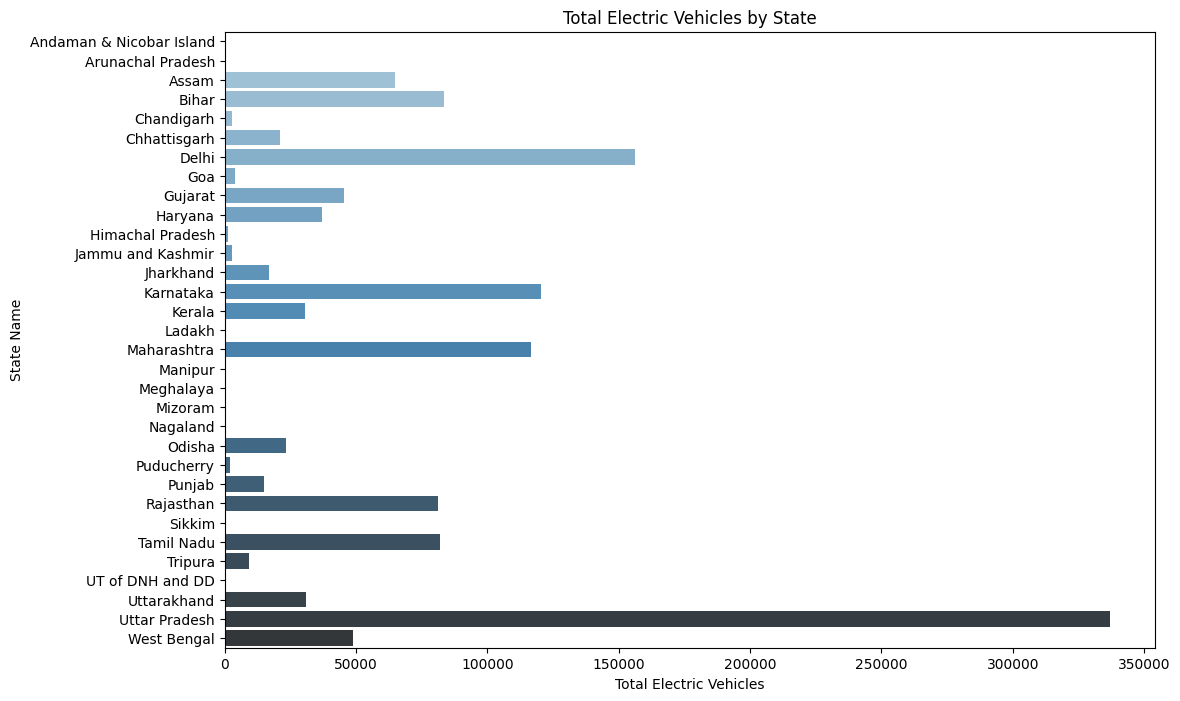

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of total electric vehicles by state
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Electric Vehicle', y='State Name', data=cleaned_ev_data, palette='Blues_d')
plt.title('Total Electric Vehicles by State')
plt.xlabel('Total Electric Vehicles')
plt.ylabel('State Name')
plt.show()


<Figure size 1400x1000 with 0 Axes>

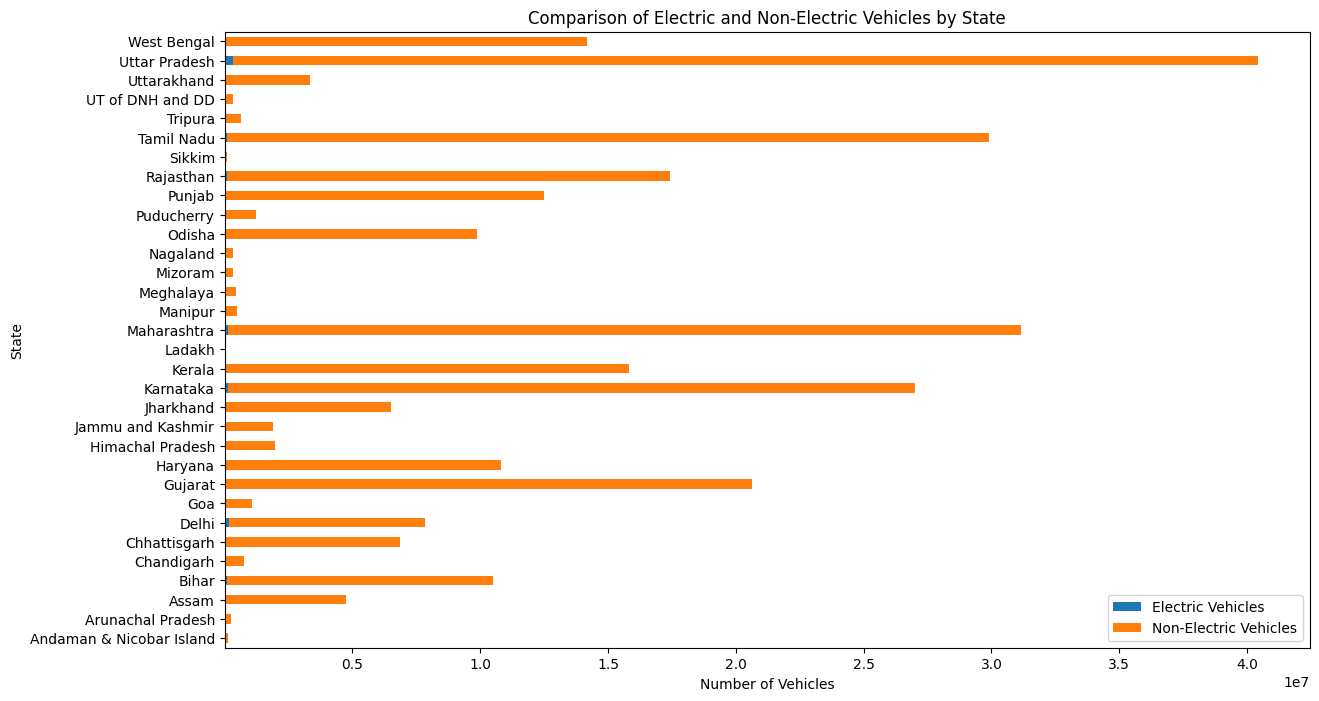

In [5]:
# Plot comparison between Electric and Non-Electric Vehicles
plt.figure(figsize=(14, 10))
cleaned_ev_data.plot(kind='barh', x='State Name', y=['Total Electric Vehicle', 'Total Non-Electric Vehicle'], stacked=True, figsize=(14, 8))
plt.title('Comparison of Electric and Non-Electric Vehicles by State')
plt.xlabel('Number of Vehicles')
plt.ylabel('State')
plt.legend(['Electric Vehicles', 'Non-Electric Vehicles'])
plt.show()


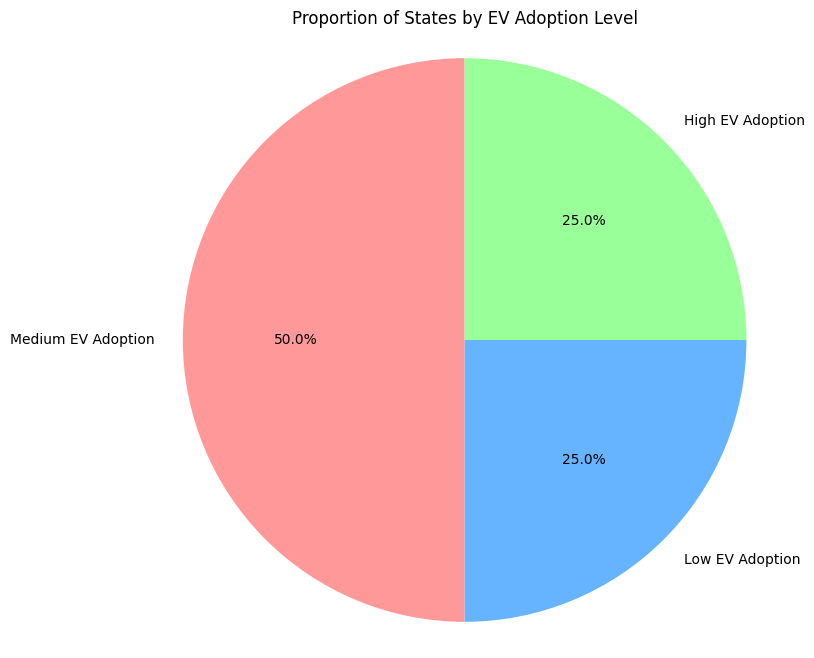

In [6]:
# Pie chart for segmentation
adoption_counts = cleaned_ev_data['EV Adoption Level'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(adoption_counts, labels=adoption_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=90)
plt.title('Proportion of States by EV Adoption Level')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


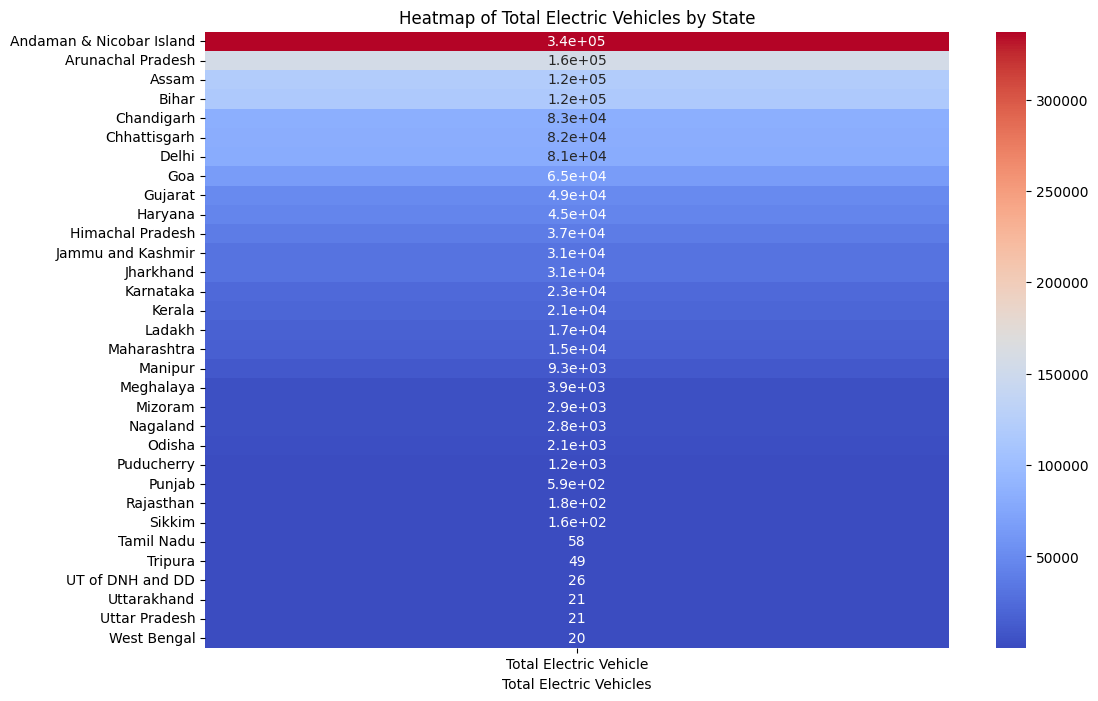

In [7]:
# Heatmap of Electric Vehicles by State
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_ev_data[['Total Electric Vehicle']].sort_values(by='Total Electric Vehicle', ascending=False), annot=True, cmap='coolwarm', cbar=True, yticklabels=cleaned_ev_data['State Name'])
plt.title('Heatmap of Total Electric Vehicles by State')
plt.xlabel('Total Electric Vehicles')
plt.show()
